# Ground truth data

In [1]:
from src import load_point_cloud, show_point_cloud, draw_unit_cube

In [2]:
xyz, n = load_point_cloud('netsuke100k')

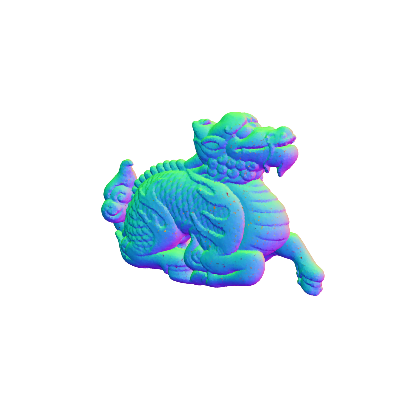

In [3]:
_, ax = show_point_cloud(xyz, n, elev=20, azim=-20);

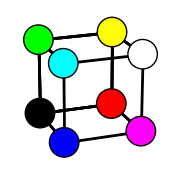

In [4]:
draw_unit_cube(elev=ax.elev, azim=ax.azim);

# Normal estimation

## PCA

In [5]:
from src import estimate_normals_pca, orient_normals, rms_angle_error

In [6]:
n_pca = estimate_normals_pca(xyz, k=50, kernel='rbf', gamma=0.5)
n_pca = orient_normals(xyz, n_pca, k=30)

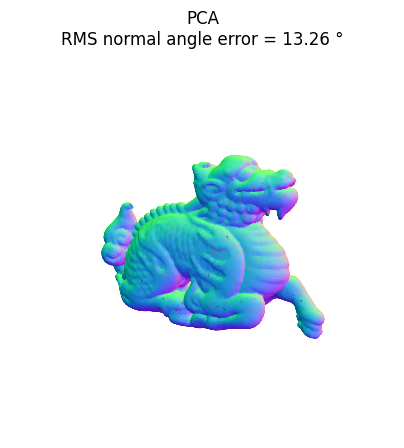

In [7]:
theta_pca = rms_angle_error(n_pca, n)
_, ax_pca = show_point_cloud(xyz, n_pca, elev=ax.elev, azim=ax.azim)
ax_pca.set_title(f'PCA\nRMS normal angle error = {theta_pca:.2f} °');

In [8]:
import numpy as np

from src.metrics import _angle_error

In [9]:
err = _angle_error(n_pca, n)

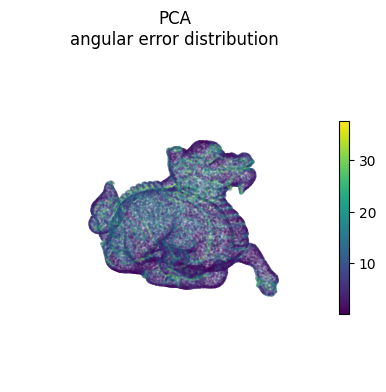

In [10]:
# remove 1 percent uppermost error values
mask = np.where(err < np.percentile(err, q=99))
_, ax_pca_err = show_point_cloud(xyz[mask],
                                 c=err[mask],
                                 cmap='viridis',
                                 elev=ax.elev,
                                 azim=ax.azim)
ax_pca_err.set_title(f'PCA\nangular error distribution');

## Kernel PCA

In [11]:
from src import estimate_normals_kpca

In [12]:
# with linear kernel and gamma set to 1, kernel PCA == vanilla PCA
n_kpca = estimate_normals_kpca(xyz, k=30, kernel='linear', gamma=1)
n_kpca = orient_normals(xyz, n_kpca, k=30)

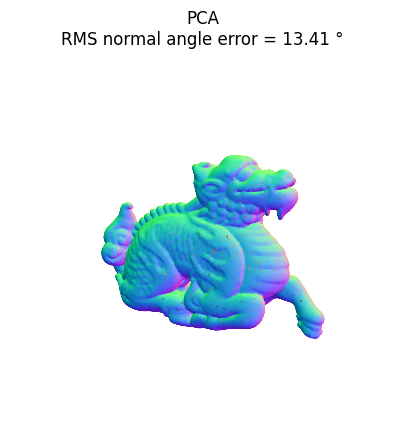

In [13]:
theta_kpca = rms_angle_error(n_kpca, n)
_, ax_kpca = show_point_cloud(xyz, n_kpca, elev=ax.elev, azim=ax.azim)
ax_kpca.set_title(f'PCA\nRMS normal angle error = {theta_kpca:.2f} °');

## Implicit B-Spline

In [14]:
from src import estimate_normals_spline

In [15]:
n_spline = estimate_normals_spline(xyz,
                                   k=50,
                                   unit=True,
                                   kernel='rbf',
                                   gamma=1)
n_spline = orient_normals(xyz, n_spline, k=30)

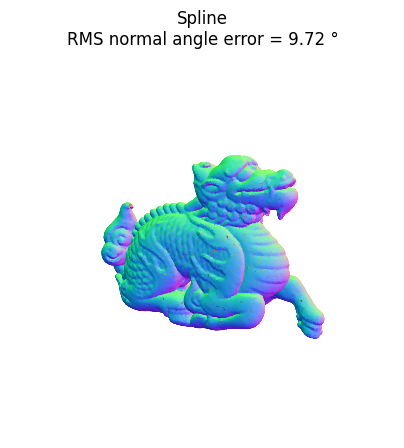

In [16]:
theta_spline = rms_angle_error(n_spline, n)
_, ax_spline = show_point_cloud(xyz, n_spline, elev=ax.elev, azim=ax.azim)
ax_spline.set_title(f'Spline\nRMS normal angle error = {theta_spline:.2f} °');

## 2D Polyfit

In [17]:
from src import estimate_normals_poly

In [18]:
n_poly = estimate_normals_poly(xyz, k=50, unit=True, deg=3)
n_poly = orient_normals(xyz, n_poly, k=30)

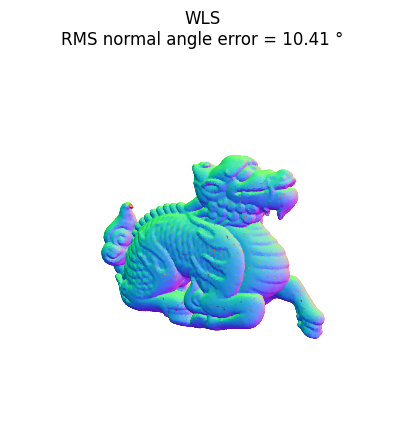

In [19]:
theta_poly = rms_angle_error(n_poly, n)
_, ax_poly = show_point_cloud(xyz, n_poly, elev=ax.elev, azim=ax.azim)
ax_poly.set_title(f'WLS\nRMS normal angle error = {theta_poly:.2f} °');